In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 로이터 뉴스 데이터 셋 불러오기
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation  
from tensorflow.keras.layers import Embedding , LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Conv1D, MaxPooling1D

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

In [8]:
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding='valid', activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         500000    
_________________________________________________________________
dropout (Dropout)            (None, None, 100)         0         
_________________________________________________________________
conv1d (Conv1D)              (None, None, 64)          32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 64)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 55)                26400     
_________________________________________________________________
dense (Dense)                (None, 1)                 56        
_________________________________________________________________
activation (Activation)      (None, 1)                 0

In [10]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=100, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
250/250 [==============================] - 16s 64ms/step - loss: 0.4531 - accuracy: 0.7695 - val_loss: 0.3305 - val_accuracy: 0.8544
Epoch 2/5
250/250 [==============================] - 15s 60ms/step - loss: 0.2931 - accuracy: 0.8751 - val_loss: 0.3383 - val_accuracy: 0.8492
Epoch 3/5
250/250 [==============================] - 15s 61ms/step - loss: 0.2518 - accuracy: 0.8982 - val_loss: 0.3329 - val_accuracy: 0.8548
Epoch 4/5
250/250 [==============================] - 15s 61ms/step - loss: 0.2154 - accuracy: 0.9149 - val_loss: 0.3455 - val_accuracy: 0.8545
Epoch 5/5
250/250 [==============================] - 15s 60ms/step - loss: 0.1799 - accuracy: 0.9314 - val_loss: 0.3666 - val_accuracy: 0.8492


In [12]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 4s 5ms/step - loss: 0.3666 - accuracy: 0.8492

 Test Accuracy: 0.8492


In [13]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

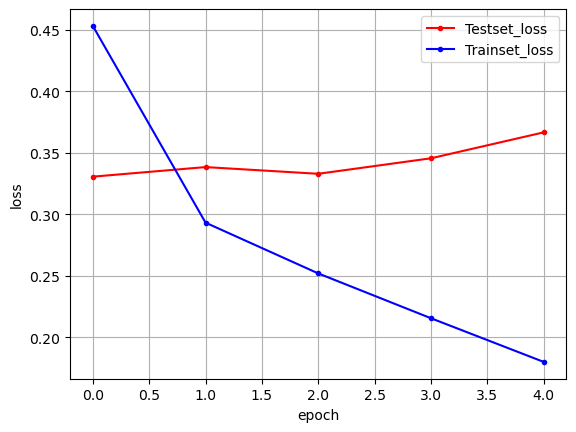

In [14]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()